# The below Analysis based on the VcIX Volatility Index. VIX is generated from the implied volatilities on index options for the S&P 500, and it shows the market's expectation of 30-day volatility. Known also as the "fear index," among other similar names, VIX is commonly used as a measure of investor confidence in the market, or, conversely, as a way of gauging how fearful market participants are that volatility will plague the space. The VIX tends to be largely based on stock market reactions; for instance, when the prices of stocks fall, VIX tends to Increase

## We will import the necessary libraries to bein our analysis

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from plotly.offline import plot,iplot,init_notebook_mode,download_plotlyjs 
import cufflinks as cf

In [3]:
cf.go_offline()
init_notebook_mode(connected=True)

##  Will first import the VIX data from the excel file containing the necessary data and properly set the data before we begin  analysis. For this analysis we will extract, UVXY, VIX, VXXBEN, UX1 to UX4, Day to Roll, Day of week, Daily Decay, Slope. The goal is to build a model around this data set that will assist us in understanding the movement of over the perid of 2016  to 2019. 

In [4]:
data = pd.read_excel("vix_data.xlsx")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254 entries, 0 to 3253
Columns: 138 entries, 1 to Unnamed: 137
dtypes: float64(15), object(123)
memory usage: 3.4+ MB


## The original Data set seems flawed for the analysis so we will carefully take the time to organize the data to another file but keeping the oriiginal for extraction for future analysis

In [6]:
vix_DataFrame = pd.read_csv("working_data.csv", index_col="Date", parse_dates=True)

# Above is the new data frame and will use to perform our analysis. See summary below.

In [7]:
vix_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3246 entries, 2006-10-23 to 2019-09-16
Data columns (total 18 columns):
UVXY               3246 non-null float64
SPY                3246 non-null float64
VXXBEN             3246 non-null float64
VIX                3246 non-null float64
UX1                3246 non-null float64
UX2                3246 non-null float64
UX3                3246 non-null float64
UX4                3246 non-null float64
Day of week        3246 non-null int64
Days to Roll       3246 non-null int64
UVXY % Change      3245 non-null float64
SPY % Change       3245 non-null float64
VXXBEN % Change    3245 non-null float64
VIX % Change       3245 non-null float64
UX1 % Change       3245 non-null float64
UX2 % Change       3245 non-null float64
UX3 % Change       3245 non-null float64
UX4 % Change       3245 non-null float64
dtypes: float64(16), int64(2)
memory usage: 481.8 KB


## The head of the data will provide us 5 items for the head of the data

In [8]:
vix_DataFrame.head()

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day of week,Days to Roll,UVXY % Change,SPY % Change,VXXBEN % Change,VIX % Change,UX1 % Change,UX2 % Change,UX3 % Change,UX4 % Change
Date,,,,,,,,,,,,,,,,,,
2006-10-23,8.377069e+09,137.47,1.910,11.08,11.95,13.16,14.08,14.60,2,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-24,8.377069e+09,137.88,2.025,10.78,11.78,12.83,14.03,14.47,3,16,0.000000,0.002982,0.060209,-0.027076,-0.014226,-0.025076,-0.003551,-0.008904
2006-10-25,7.968986e+09,138.35,1.760,10.66,11.49,12.52,13.79,14.52,4,15,-0.048714,0.003409,-0.130864,-0.011132,-0.024618,-0.024162,-0.017106,0.003455
2006-10-26,7.618653e+09,138.78,1.515,10.56,11.25,12.21,13.46,14.18,5,14,-0.043962,0.003108,-0.139205,-0.009381,-0.020888,-0.024760,-0.023930,-0.023416
2006-10-27,7.695087e+09,137.91,1.240,10.80,11.31,12.26,13.46,14.24,6,13,0.010032,-0.006269,-0.181518,0.022727,0.005333,0.004095,0.000000,0.004231


## To begin we will plot each of the items against the date time index in a simple graph. We will use the plots to . observe the over all patters of each data set over the time period.

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



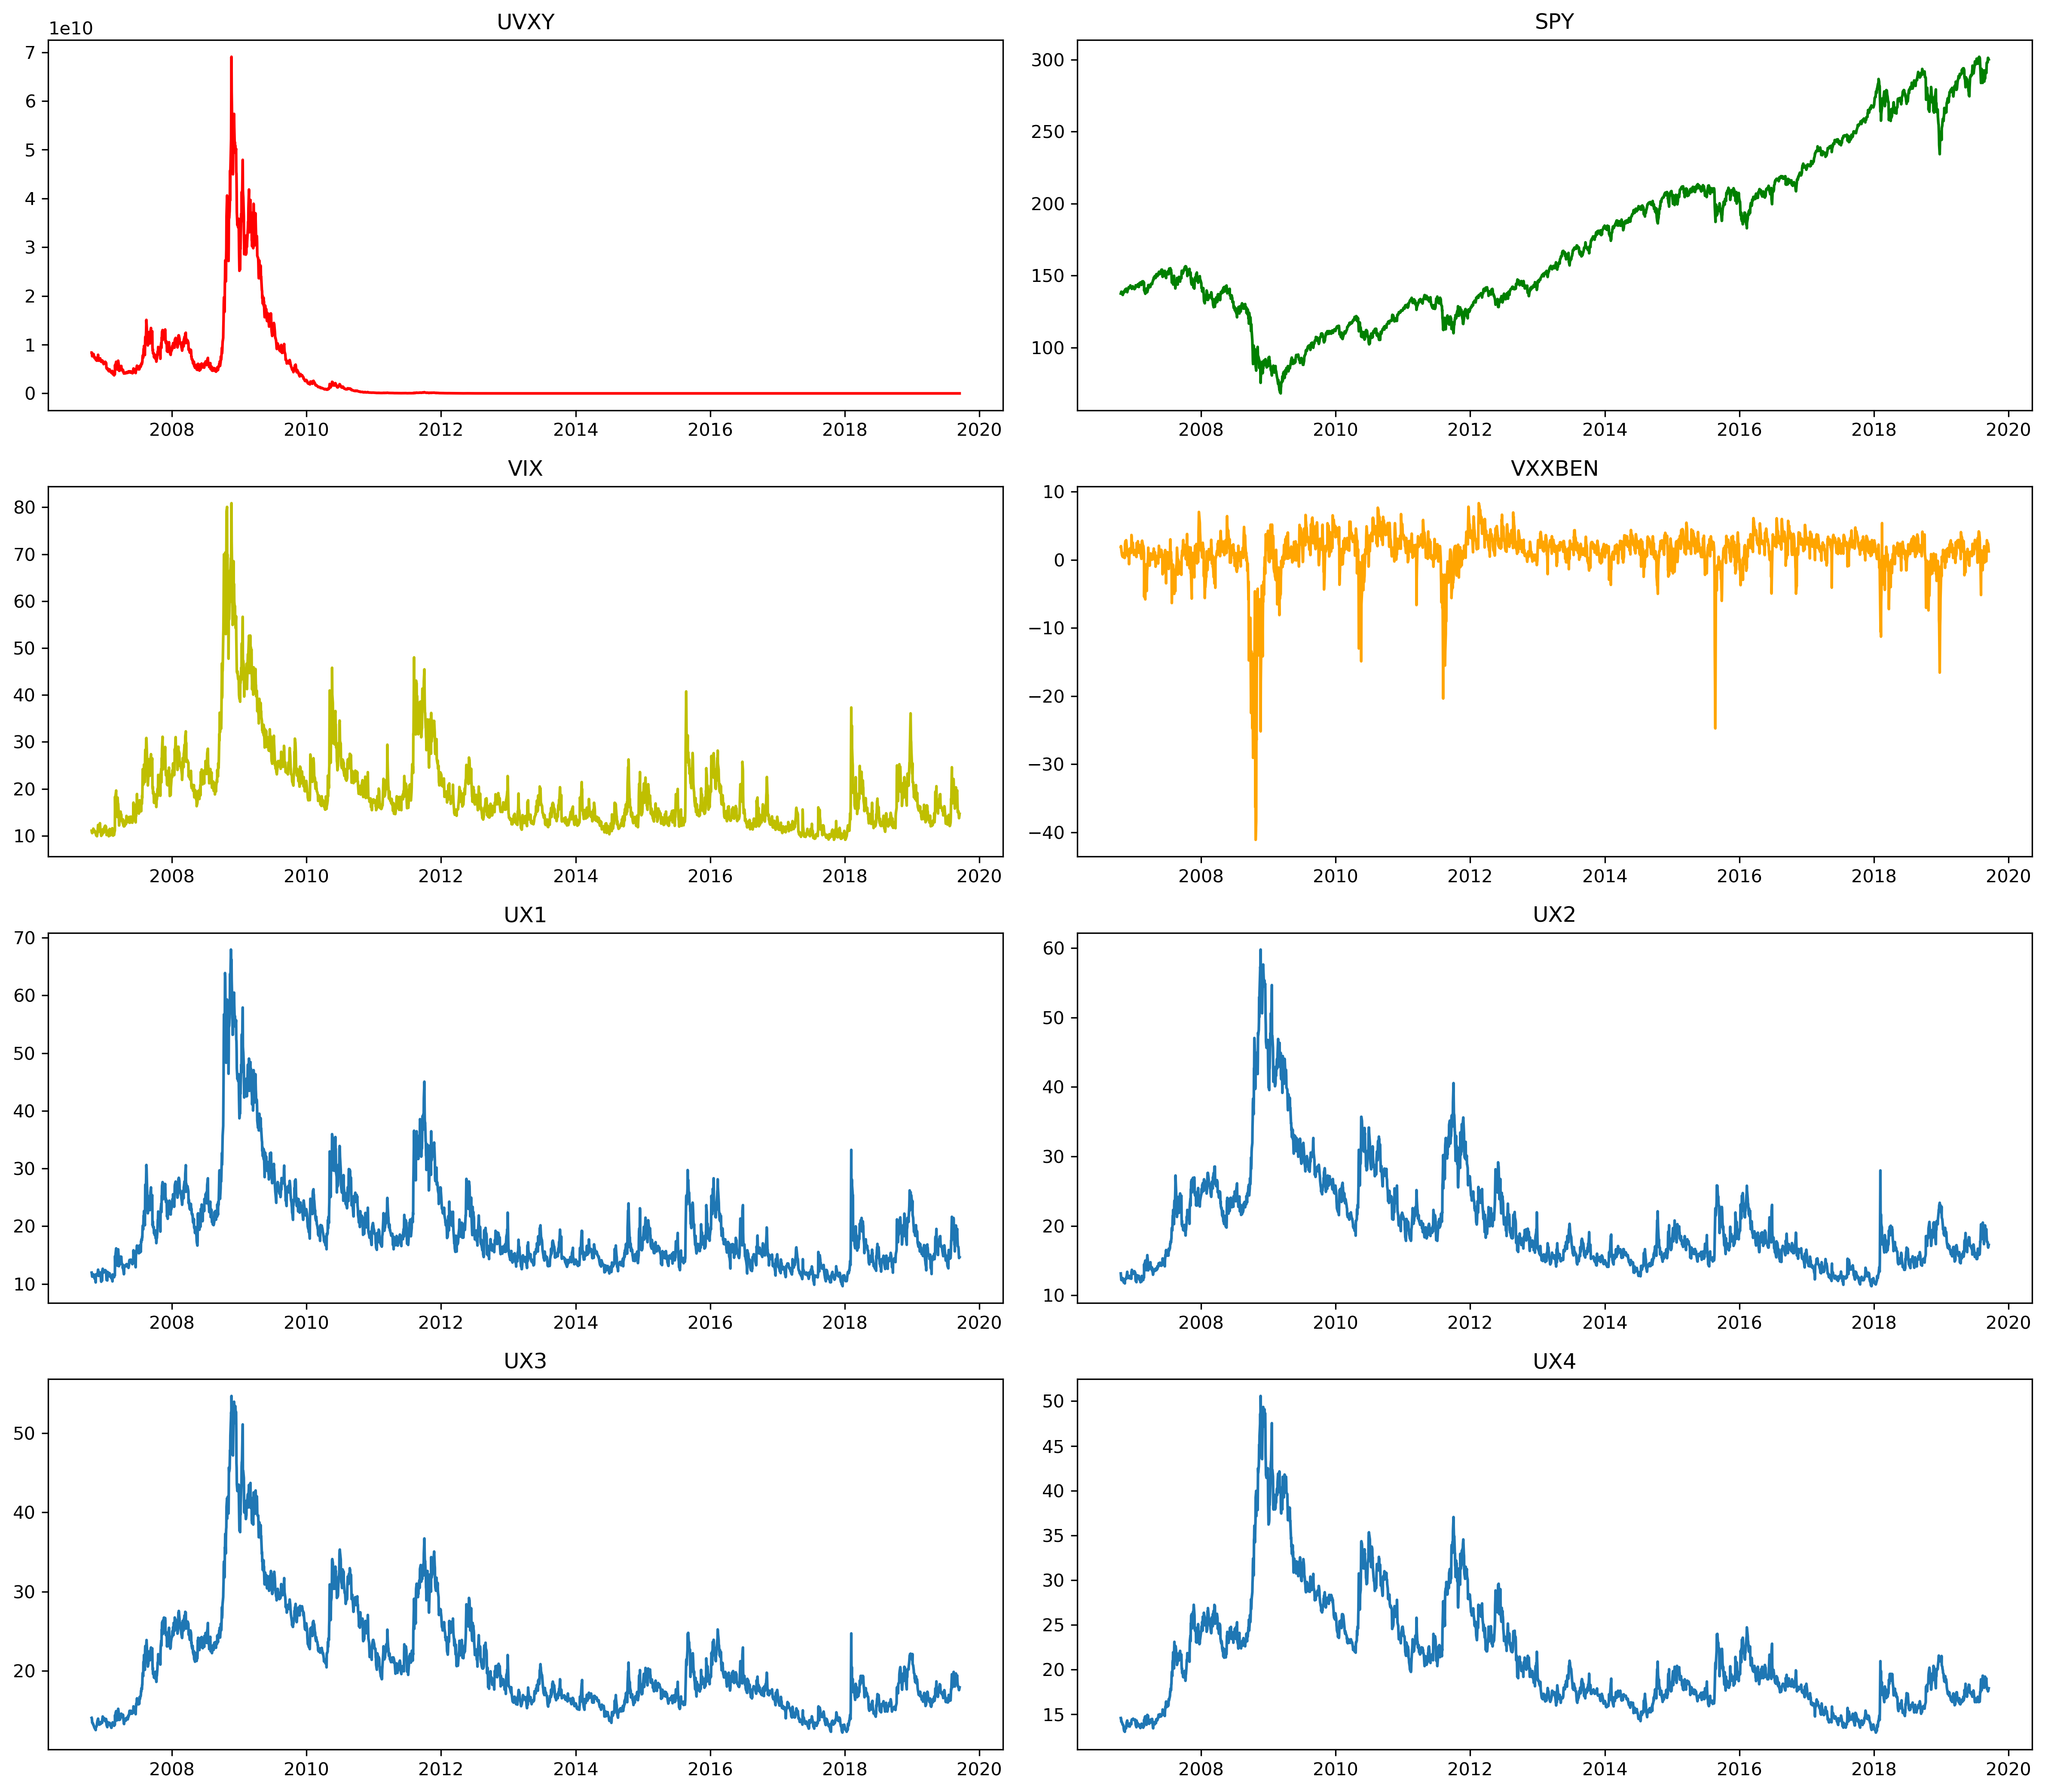

In [9]:
fig, axes = plt.subplots(4,2, dpi = 300, figsize = (16,14))
axes[0,0].plot(vix_DataFrame["UVXY"], c = "r")
axes[0,0].set_title("UVXY")
axes[0,1].plot(vix_DataFrame["SPY"], c = "g")
axes[0,1].set_title("SPY")
axes[1,0].plot(vix_DataFrame["VIX"], c = "y")
axes[1,0].set_title("VIX")
axes[1,1].plot(vix_DataFrame["VXXBEN"], c= "orange")
axes[1,1].set_title("VXXBEN")
axes[2,0].plot(vix_DataFrame["UX1"])
axes[2,0].set_title("UX1")
axes[2,1].plot(vix_DataFrame["UX2"])
axes[2,1].set_title("UX2")
axes[3,0].plot(vix_DataFrame["UX3"])
axes[3,0].set_title("UX3")
axes[3,1].plot(vix_DataFrame["UX4"])
axes[3,1].set_title("UX4")
plt.tight_layout()

### From these above we see a few patterns. VIX, UX1 - 4 and VXXBEN is inversely coorelated as well . UVXY never seemed to climb back after the fall in 2010. ALso see that when SPY takes a dip so does VXXBEN.  The 2008 Crash caused major movements in the data sets. Lets try to see if there are any correlations or predictive patterns we can find in the data

____

# Lets first see if there is any correlation within the values of each data series over the given period

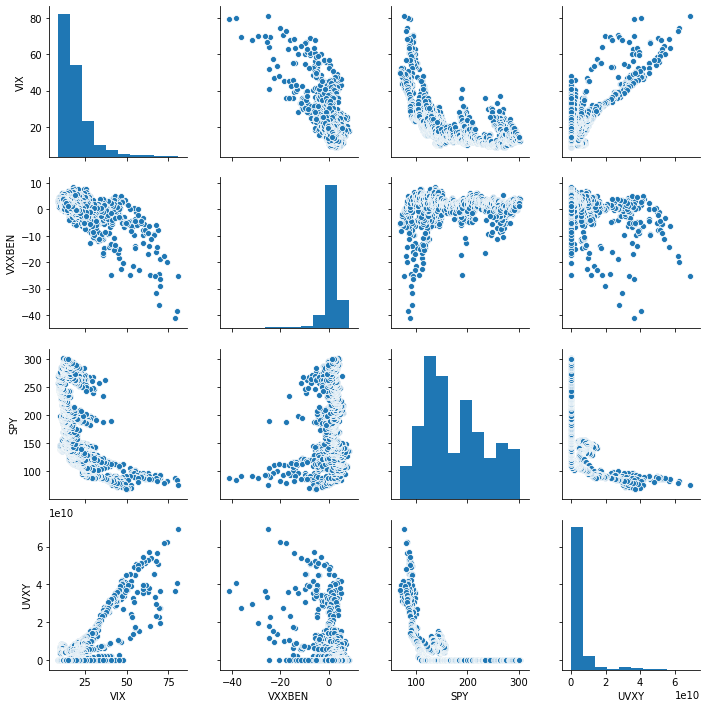

In [10]:
sns.pairplot(vix_DataFrame[["VIX","VXXBEN", "SPY","UVXY"]])

# From the above plot we see a few things. VIX and UVXY appears to have a strong positive correlation to one another. Where as we see VIX and  VXXBEN has a somewhat strong negaitve correlation to one another. SPY also shows a negative correlaiton to VIX. To find these correlations we will plot a heat map below to determine.

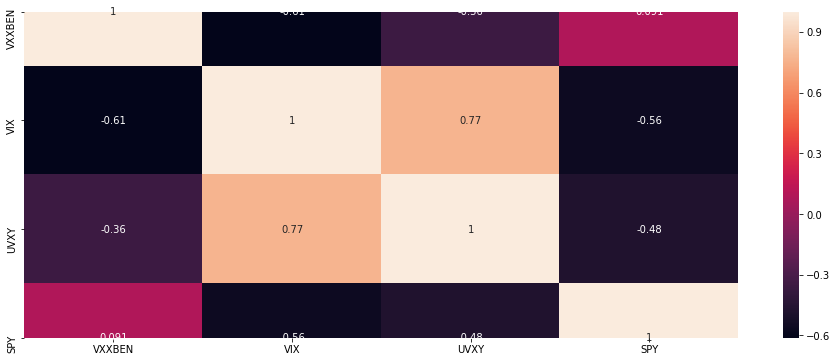

In [11]:
plt.figure(figsize=(16,6))
sns.heatmap(vix_DataFrame[["VXXBEN","VIX","UVXY","SPY"]].corr(), annot=True)

## From the above heatmap the 3 correlaiton series that we must take into account is the Negative correlation between SPY with VIX and UVXY as well as the positive correlaiton between UVXY and VIX, as well as VXXBEN and VIX 

# Next We will check the daily changes for each data series to  observe the behavior on a daily basis.

In [12]:
vix_DataFrame["UVXY % Change"] = ((vix_DataFrame["UVXY"]/vix_DataFrame["UVXY"].shift(1)) -1)

In [13]:
vix_DataFrame["SPY % Change"] = ((vix_DataFrame["SPY"]/vix_DataFrame["SPY"].shift(1)) -1) 

In [14]:
vix_DataFrame["VXXBEN % Change"] = ((vix_DataFrame["VXXBEN"]/vix_DataFrame["VXXBEN"].shift(1)) -1) 

In [15]:
vix_DataFrame["VIX % Change"] = ((vix_DataFrame["VIX"]/vix_DataFrame["VIX"].shift(1)) -1)

In [16]:
vix_DataFrame["UX1 % Change"] = ((vix_DataFrame["UX1"]/vix_DataFrame["UX1"].shift(1)) -1)

In [17]:
vix_DataFrame["UX2 % Change"] = ((vix_DataFrame["UX2"]/vix_DataFrame["UX2"].shift(1)) -1) 

In [18]:
vix_DataFrame["UX3 % Change"] = ((vix_DataFrame["UX3"]/vix_DataFrame["UX3"].shift(1)) -1)

In [19]:
vix_DataFrame["UX4 % Change"] = ((vix_DataFrame["UX4"]/vix_DataFrame["UX4"].shift(1)) -1)

## We will check if there are any correlation between the changes of each series

In [20]:
vix_DataFrame = pd.read_csv("working_data.csv", index_col = "Date", parse_dates = True)

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning:

invalid value encountered in greater_equal

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning:

invalid value encountered in less_equal



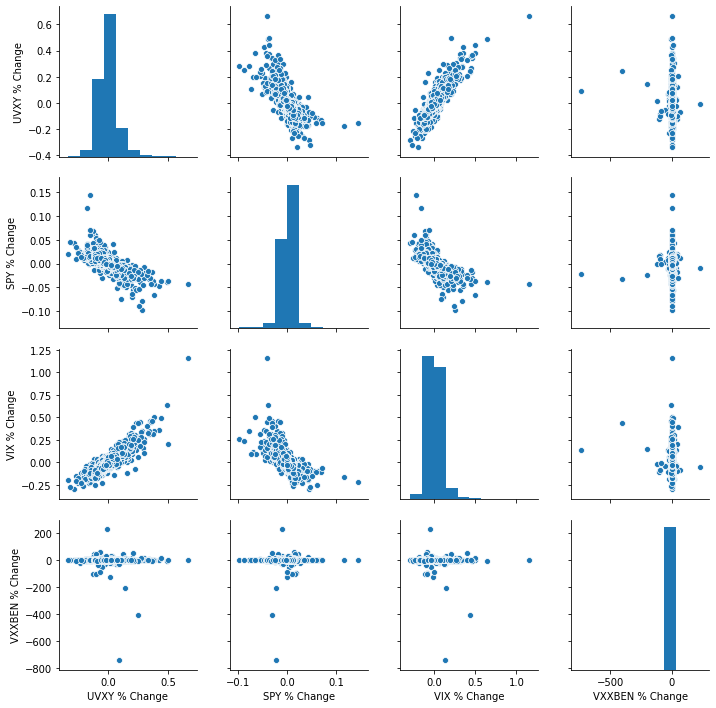

In [21]:
sns.pairplot(vix_DataFrame[["UVXY % Change", "SPY % Change", "VIX % Change","VXXBEN % Change"]])

## The Scatter matrix above shows that there is some correlation in the changes of UVXY and VIX, a negative correlation between VIX and SPY, Negative between UVXY and SPY, and a very strong correlation between UVXY and  VIX, Lets put this to the test by plotting a heat map with the chenges in these items

In [22]:
change_Matrix = vix_DataFrame[["UVXY % Change", "SPY % Change", "VIX % Change","VXXBEN % Change"]].corr()
change_Matrix

,UVXY % Change,SPY % Change,VIX % Change,VXXBEN % Change
UVXY % Change,1.000000,-0.767666,0.882705,-0.042276
SPY % Change,-0.767666,1.000000,-0.724097,0.046464
VIX % Change,0.882705,-0.724097,1.000000,-0.068953
VXXBEN % Change,-0.042276,0.046464,-0.068953,1.000000


## We can see above in the matrix that there is some strong correlaiton between the chenged in these data series

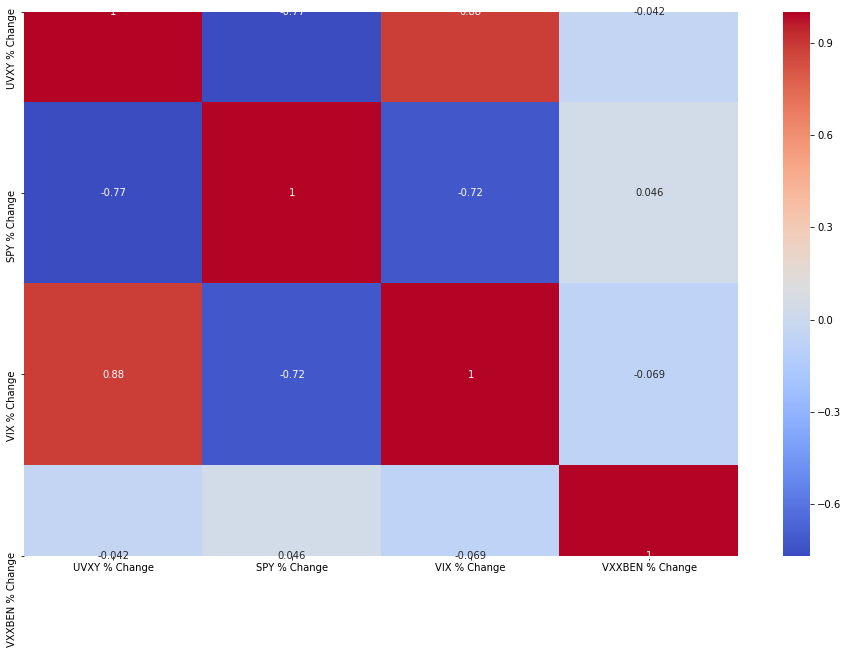

In [23]:
plt.figure(figsize=(16,10))
sns.heatmap(change_Matrix, annot=True, cmap = "coolwarm");

## Interesting finding here is that the daily change in ViX and the change in VXXBEN is not longer closely correlated(negative). So we can determine that we variable that is changing VIX is not necessarly effecting the value of VXXBEN.  For the mement we will eliminate . VXXBEN from the analysis of VIX

### to get a better understanding of the data series we will also check the correlation in the daily changes betwee VIX and UX1 -> 4

In [24]:
corr_vix_UX1to = vix_DataFrame[["VIX % Change", "UX1 % Change", "UX2 % Change", "UX3 % Change", "UX4 % Change"]].corr()

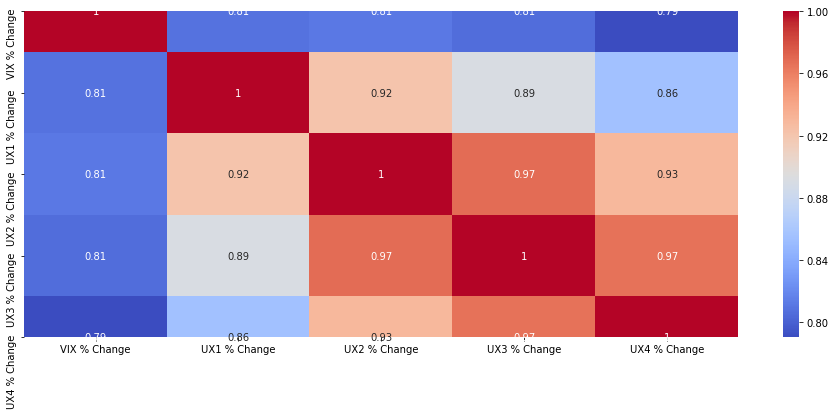

In [25]:
plt.figure(figsize=(16,6))
sns.heatmap(corr_vix_UX1to, annot=True, cmap = "coolwarm");

### We find thst there is a strong correlation between VIX and UX1 -> 4.  With the above chart showing that there is an 88% correlation between VIX and UVXY we can assume that there is a strong corrlation between UVXY and UX1->4. We will plot this again including UVXY

In [26]:
corr_vix_UVXY_UX = vix_DataFrame[["VIX % Change", "UVXY % Change","UX1 % Change", "UX2 % Change", "UX3 % Change", "UX4 % Change"]].corr()

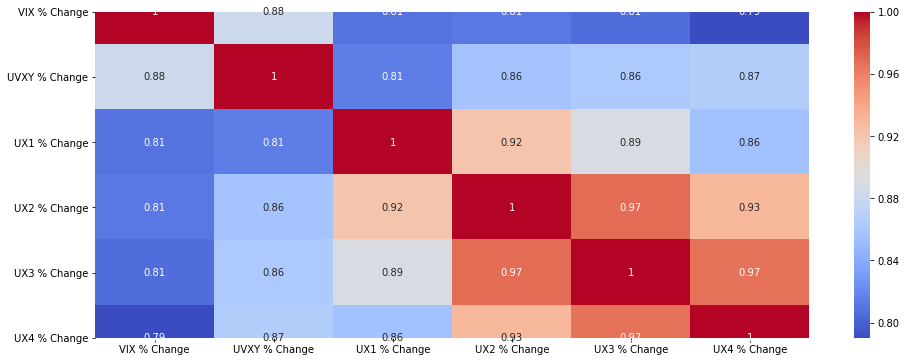

In [27]:
plt.figure(figsize=(16,6))
sns.heatmap(corr_vix_UVXY_UX, annot=True, cmap="coolwarm");

### With the above correlaton heatmap analysis these data series should move in a similar patterns over the period so we will take a look at this using a simple box plot. Since we have determined that UVXY, VIX and UX1 though 4 is strongly correlated we should se a pattern in this data movement over the period.

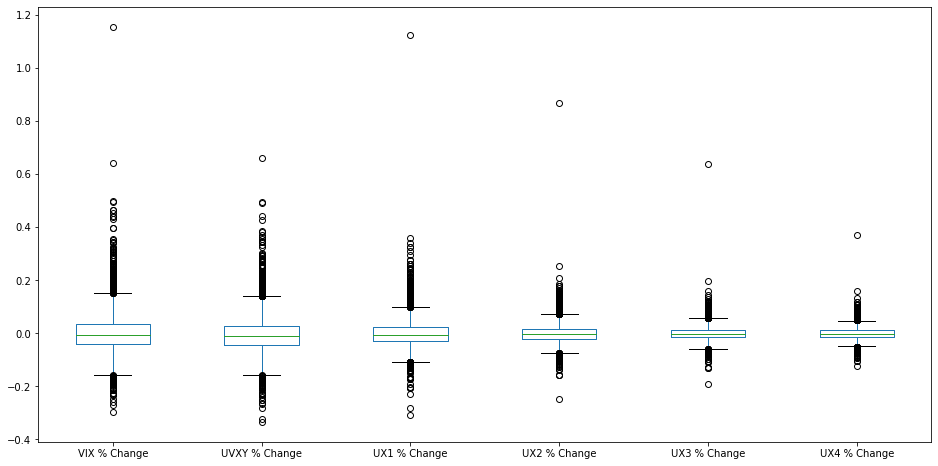

In [28]:
vix_DataFrame[["VIX % Change", "UVXY % Change","UX1 % Change", "UX2 % Change", "UX3 % Change", "UX4 % Change"]].plot(kind = "box", figsize = (16,8));


## Other than a few outlyers in the data we can see that the changes in these data sets are pretty consistant with our correlation heat map. We can also determine here a the there is less volitility in the UX4 data series. 

## Now Lets take a look at Data set in relation to the roll days. We will group the data around the roll days and see the average value for each data set as the day to roll changes

In [29]:
days_Rolling = vix_DataFrame.groupby("Days to Roll").mean()
days_Rolling.head()

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day of week,UVXY % Change,SPY % Change,VXXBEN % Change,VIX % Change,UX1 % Change,UX2 % Change,UX3 % Change,UX4 % Change
Days to Roll,,,,,,,,,,,,,,,,,
1,3.296700e+09,176.362839,0.726968,18.979742,19.160839,20.071516,20.712548,21.116323,2.380645,-0.020180,0.001984,-0.826698,-0.009653,-0.009672,-0.008110,-0.004657,-0.003910
2,3.322420e+09,176.036978,0.624565,19.223548,19.334742,20.250290,20.807548,21.192452,1.619355,-0.008328,0.000338,-0.396803,0.008223,-0.008065,-0.004580,-0.002802,-0.000768
3,3.319185e+09,175.939890,0.901194,19.209806,19.544097,20.343613,20.868484,21.213645,3.638710,-0.008257,0.000306,-1.149735,0.001449,-0.005497,-0.003357,-0.002421,-0.001885
4,3.279151e+09,175.867392,0.986597,19.211419,19.614323,20.378806,20.890484,21.230290,4.245161,-0.009956,0.002409,-0.041512,-0.013468,-0.009658,-0.005030,-0.004410,-0.003821
5,3.299350e+09,175.591529,0.718484,19.575226,19.828968,20.504710,20.997452,21.320742,3.245161,0.010103,-0.001462,-0.012062,0.007814,0.004708,0.004107,0.004240,0.003496


# For this we will check the average change in each data as we perform the analysis. We sill start with the change in UVXY

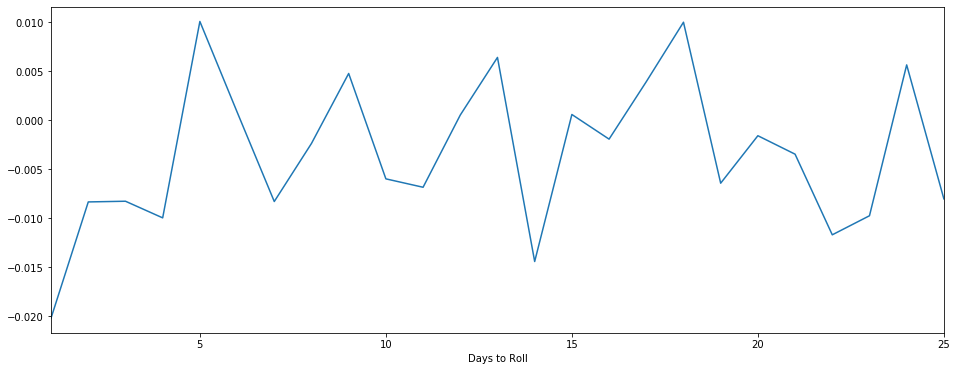

In [30]:
days_Rolling["UVXY % Change"].plot(figsize = (16,6))

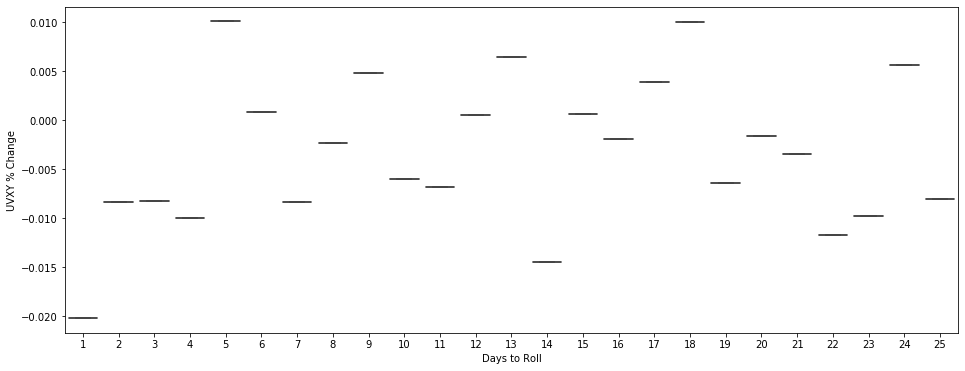

In [31]:
plt.figure(figsize=(16,6))
sns.boxplot(x = days_Rolling.index, y = "UVXY % Change", data= days_Rolling)

## In summary it looks as though there is positive behavior in the  average change in UVXY every 4 days in relation to the Rolling Days. Starting with the 5th day in the rolling period we can see a pattering in the daily changes in the values. Graph also shows that every three days starting with the 4th day there is negative changes in UVXY

___

# VIX Daily %  Change

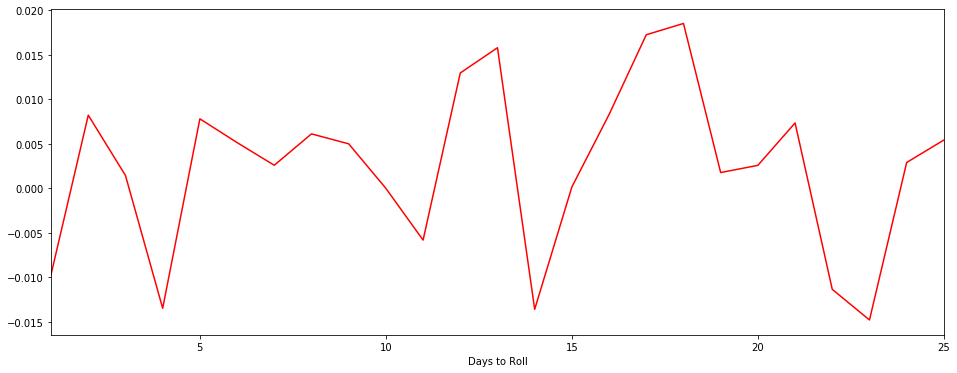

In [32]:
days_Rolling["VIX % Change"].plot(color = "red",figsize = (16,6))

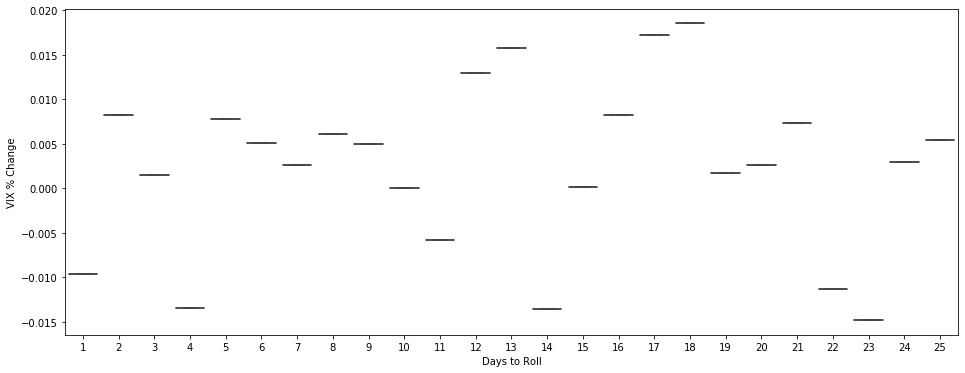

In [33]:
plt.figure(figsize=(16,6))
sns.boxplot(x = days_Rolling.index, y = "VIX % Change", data= days_Rolling)

## In summary it looks as though there is positive behavior in the  average change in VIX every 4 days in relation to the Rolling Days. Starting with the 5th day in the rolling period we can see a pattering in the daily changes in the values. Graph also shows that every 3 days starting with the 4th day there is negative changes in UVXY. This can be safe to assume since there is a strong correlation to UVXY 

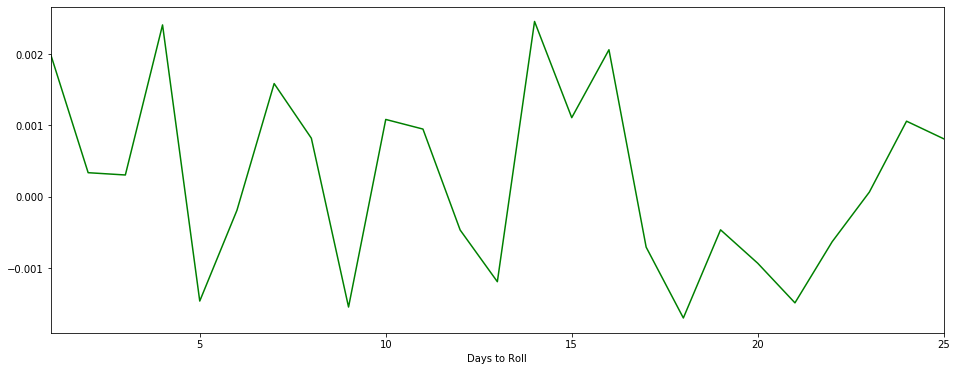

In [34]:
days_Rolling["SPY % Change"].plot(color = "green",figsize = (16,6))

## Since we have determined that VIX and UVXY are strongly correlated and SPY is the inversely coorelated  to these two data sets. We can assume SPY will present the opposite behavior of the two. So out guess above is that SPY will be down on the 5th day and every 4 days after and SPY will show an average of positive changes on the 4th day and every 3 days there after. 

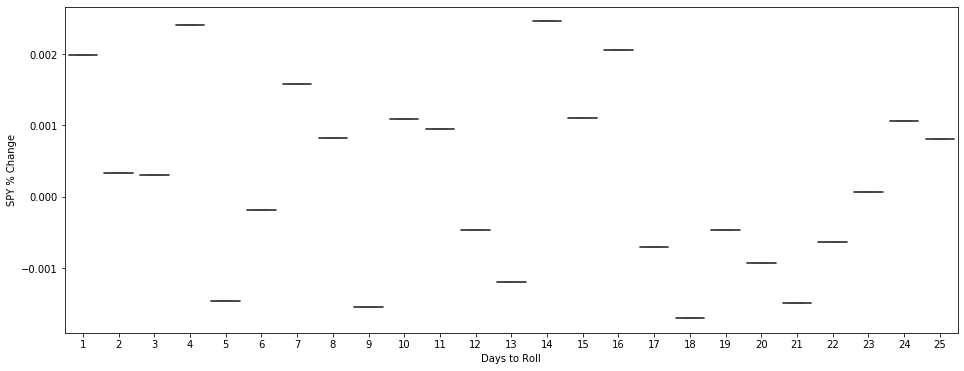

In [35]:
plt.figure(figsize=(16,6))
sns.boxplot(x = days_Rolling.index, y = "SPY % Change", data= days_Rolling)

## Below we can chek the behavior of VXXBEN in relation to the Rolling Days. Since we determined that VXXBEN has a low correlaiton to any of the other data sets then if would be a good idea not to consider building a model around VXXBEN

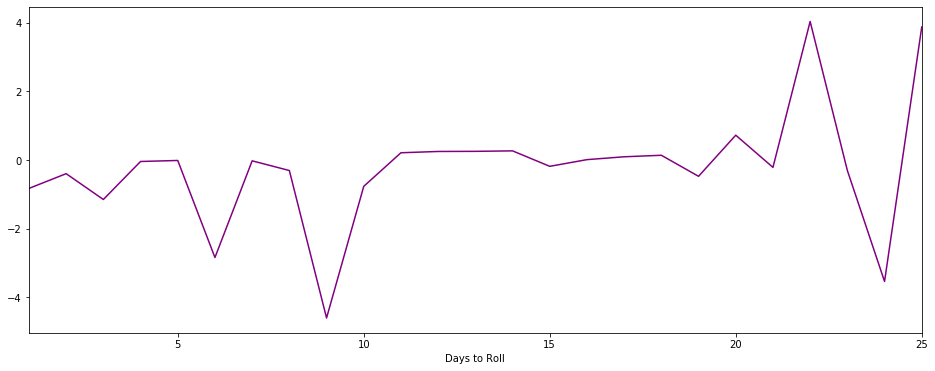

In [36]:
days_Rolling["VXXBEN % Change"].plot(color = "purple",figsize = (16,6))

## Below will plot the behavior of UX1 to 5 based around the rolling days as well. We seen about that these data sets are strongly correlated so they should no doubt show similarities in behavior. Also since the data is strongly correlated to UVXY and VIX then we shoudl also see the same patterns in the average change around the roll below as well 

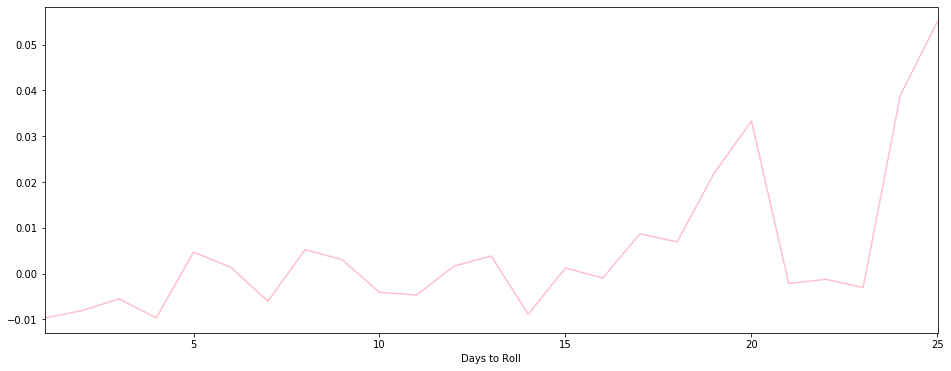

In [37]:
days_Rolling["UX1 % Change"].plot(color = "pink",figsize = (16,6))

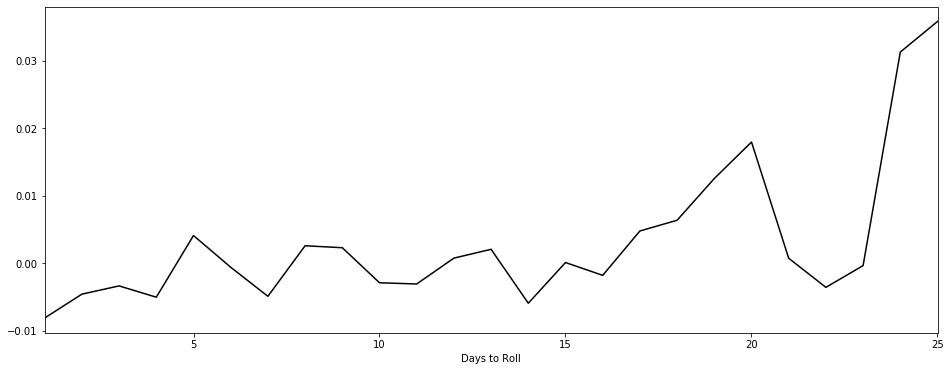

In [38]:
days_Rolling["UX2 % Change"].plot(color = "black",figsize = (16,6))

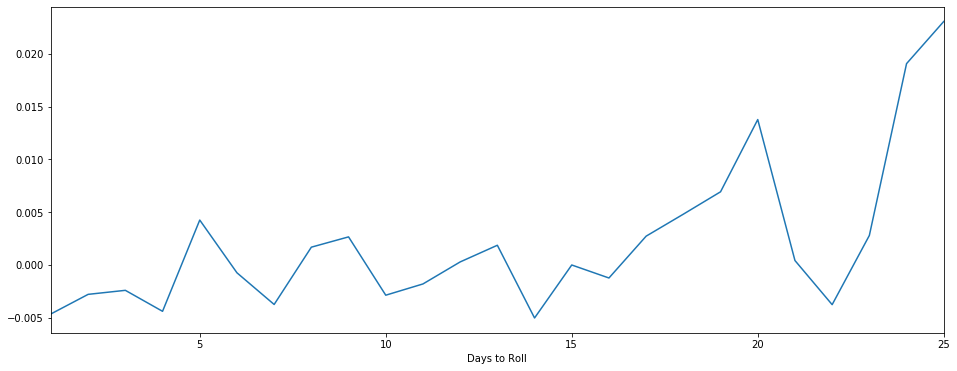

In [39]:
days_Rolling["UX3 % Change"].plot(figsize = (16,6))

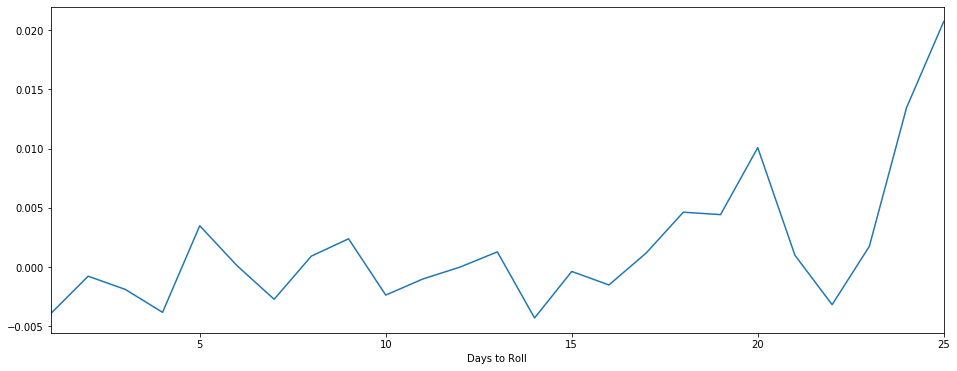

In [40]:
days_Rolling["UX4 % Change"].plot(figsize = (16,6))

# Linear Regression - VIX

In [44]:
vix_DataFrame.head()

,UVXY,SPY,VXXBEN,VIX,UX1,UX2,UX3,UX4,Day of week,Days to Roll,UVXY % Change,SPY % Change,VXXBEN % Change,VIX % Change,UX1 % Change,UX2 % Change,UX3 % Change,UX4 % Change
Date,,,,,,,,,,,,,,,,,,
2006-10-23,8.377069e+09,137.47,1.910,11.08,11.95,13.16,14.08,14.60,2,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-24,8.377069e+09,137.88,2.025,10.78,11.78,12.83,14.03,14.47,3,16,0.000000,0.002982,0.060209,-0.027076,-0.014226,-0.025076,-0.003551,-0.008904
2006-10-25,7.968986e+09,138.35,1.760,10.66,11.49,12.52,13.79,14.52,4,15,-0.048714,0.003409,-0.130864,-0.011132,-0.024618,-0.024162,-0.017106,0.003455
2006-10-26,7.618653e+09,138.78,1.515,10.56,11.25,12.21,13.46,14.18,5,14,-0.043962,0.003108,-0.139205,-0.009381,-0.020888,-0.024760,-0.023930,-0.023416
2006-10-27,7.695087e+09,137.91,1.240,10.80,11.31,12.26,13.46,14.24,6,13,0.010032,-0.006269,-0.181518,0.022727,0.005333,0.004095,0.000000,0.004231


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [46]:
vix_DataFrame.columns

Index(['UVXY', 'SPY', 'VXXBEN', 'VIX', 'UX1', 'UX2', 'UX3', 'UX4',
       'Day of week', 'Days to Roll', 'UVXY % Change', 'SPY % Change',
       'VXXBEN % Change', 'VIX % Change', 'UX1 % Change', 'UX2 % Change',
       'UX3 % Change', 'UX4 % Change'],
      dtype='object')

In [47]:
model_Data = vix_DataFrame[['UVXY', 'SPY', 'VXXBEN', 'VIX', 'UX1', 'UX2', 'UX3', 'UX4']]

In [76]:
X = model_Data[['UVXY', 'SPY', 'VXXBEN','UX1', 'UX2', 'UX3', 'UX4']]
y = model_Data["VIX"]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [78]:
li_mod = LinearRegression()

In [79]:
li_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
li_mod.intercept_

-0.000557392923173694

In [81]:
co_effs = pd.DataFrame(li_mod.coef_, index= X.columns, columns= ["Model Coefficients"])

In [82]:
co_effs

,Model Coefficients
UVXY,-3.364963e-14
SPY,7.762484e-07
VXXBEN,-6.666393e-01
UX1,6.666774e-01
UX2,3.333282e-01
UX3,1.598537e-04
UX4,-1.469996e-04


In [83]:
predi = li_mod.predict(X_test)

In [84]:
predi[0:30]

array([11.48980172, 11.23987303, 24.22980565, 15.04985183, 22.80972548,
       12.78981789, 13.36984685, 11.09942965, 30.98038319, 12.40998041,
       22.42006389, 15.10998323, 28.83992956, 24.98992911, 13.95989675,
       24.97979454, 43.05000769, 15.28982654, 12.17989659, 19.63978867,
       12.98984683, 11.49978433, 11.97141823, 25.42006984, 10.76957284,
       26.30971205, 29.96018901, 12.83000481, 12.23976199, 25.67017138])

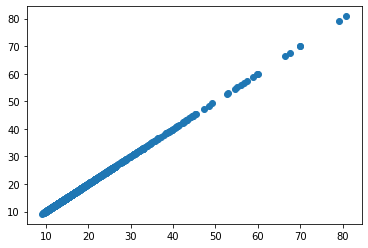

In [85]:
plt.scatter(x = y_test, y = predi)

### lets check the error metrics

In [86]:
from sklearn import metrics

In [87]:
metrics.mean_absolute_error(y_test, predi)

0.0005861949664866116

In [88]:
metrics.mean_squared_error(y_test, predi)

0.0001485936144035122

In [68]:
np.sqrt(metrics.mean_squared_error(y_test, predi))

0.012189898047297696

# lets bring in daily decay on to the data set